# 随机梯度下降法
## 梯度下降法的缺点
+ 从上一节推导出的下面的表达式可知，每一个样本都参与了运算，这使得当样本数较大时，计算梯度也会很慢，这种方法叫做`批量梯度下降法`
+ 为了解决样本数量影响训练时间的问题，有了本节的`随机梯度下降法`
![最终的损失函数J的导数dJ的向量化表示](../05-Vectorize-Gradient-Descent/images/最终的损失函数J的导数dJ的向量化表示.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)

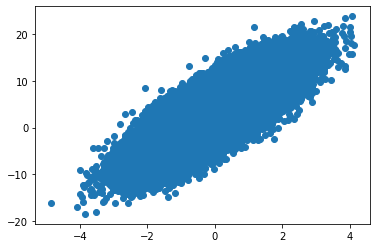

In [3]:
plt.scatter(x, y)
plt.show()

## 批量梯度下降法(Stochastic Gradient Descent)

In [4]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

def fit_gd(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break

        cur_iter += 1

    return theta

In [5]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = fit_gd(X_b, y, initial_theta, eta)

Wall time: 933 ms


In [6]:
theta

array([3.01400049, 3.98951984])

## 随机梯度下降法
>无需指定学习率，每次迭代时计算一个随机点，通过方法计算得到学习率.**可以大大提高训练速度**
![随机梯度下降法方程推导](images/随机梯度下降法方程推导.jpg)
![随机梯度下降法中η的取值](images/随机梯度下降法中η的取值.png)
> 上面η的变化过程实际就是`模拟退火`的思想
![模拟退火的表达式](images/模拟退火的表达式.png)

In [7]:
def dJ_sgd(theta, X_b_i, y_i): # 随机梯度下降法的变化率表达式，这里只取一个点，下面会迭代多次来实现收敛的目的
    return 2 * X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2.

In [8]:
def fit_sgd(X_b, y, initial_theta, n_iters): # 和上一节的fit_gd进行比较
    # 下面是两个经验值，仅供参考
    t0 = 5
    t1 = 50
    
    def learning_rate(t): # 这里的学习率不能用固定的η了
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
    return theta

In [9]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = fit_sgd(X_b, y, initial_theta, n_iters=m//3) # 耗时相对于fit_gd大幅降低，准确率却几乎差不多，可以看到随机梯度下降法的威力了，所以在对训练时间要求高地场景强烈推荐随机梯度下降法

Wall time: 207 ms


In [10]:
theta

array([2.94240975, 3.90353915])